In [437]:
import pickle
import matplotlib.pyplot as plt
import random
import glob
import numpy as np
import numpy.typing as npt

In [438]:
def show_first_8_imgs(imgs_paths: list[str]):
    # random.seed(42)

    plt.figure(figsize=(12,12))  # specifying the overall grid size


    for i, image_path in enumerate(random.sample(imgs_paths, min(len(imgs_paths), 8))):
        img = plt.imread(image_path)

        plt.subplot(4, 4, i + 1)  # the number of images in the grid is 5*5 (25)
        plt.axis("off")
        plt.imshow(img)

    print(f"number of result: {len(imgs_paths)}")
    plt.axis("off")
    plt.show()

In [439]:
# face_count: multi-face | single-face | no-face
# emotion_name: happy | sad | angry | neutral | surprise | fear | disgust
# face_class: any number

def query(face_class: str,face_count: str , emotion_name:str):
    face_class_imgs: list[str] = []
    face_count_imgs: list[str] = []
    emotion_name_imgs: list[str] = []
    
    with open(f'out/results/frequent-face-classes.pkl', "rb") as f:
        frequent_face_classes = pickle.load(f)
        face_class_imgs: list[str] = frequent_face_classes[face_class]

    with open(f'out/results/{face_count}.pkl', "rb") as f:
        face_count_imgs: list[str] = pickle.load(f)

    with open(f'out/results/emotions-dict.pkl', "rb") as f:
        emotions_classes = pickle.load(f)
        emotion_name_imgs: list[str] = emotions_classes[emotion_name]
        
    # image_path = f"./out/{face_class}"
    # plt.figure(figsize=(1,1))
    # img = plt.imread(glob.glob(f"{image_path}/*.jpg")[0])
    # plt.axis("off")
    # plt.imshow(img)


    # return np.intersect1d(face_class_imgs, emotion_name_imgs)
    return list(set(face_class_imgs).intersection(set(face_count_imgs)).intersection(set(emotion_name_imgs)))

number of result: 28


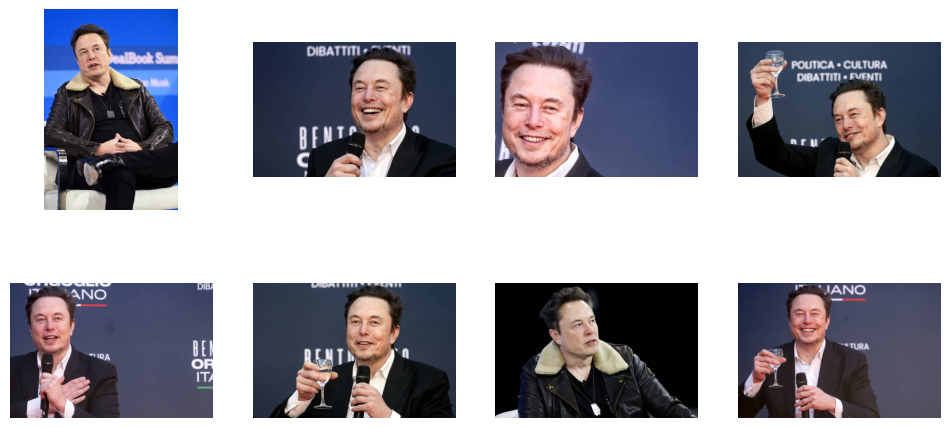

In [440]:
imgs = query(
    face_class="1", 
    face_count="single-face",
    emotion_name="happy"
)
show_first_8_imgs(imgs)

number of result: 18


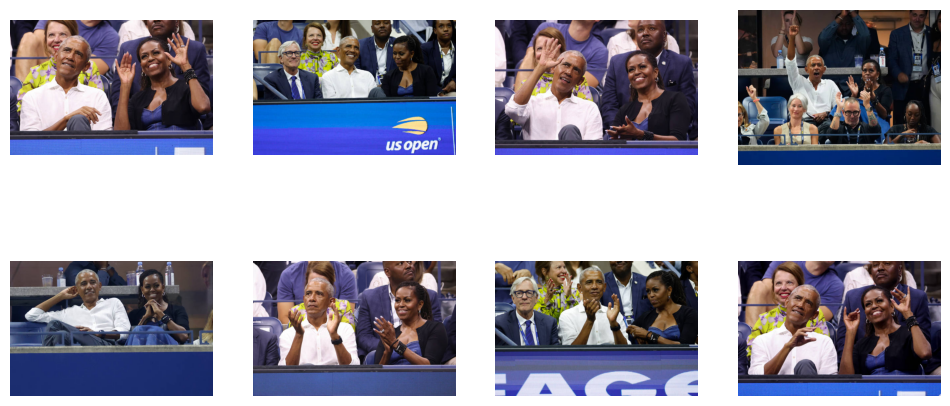

In [441]:
imgs = query(
    face_class="12", 
    face_count="multi-face",
    emotion_name="happy"
)
show_first_8_imgs(imgs)

number of result: 2


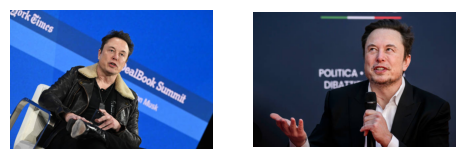

In [442]:
imgs = query(
    face_class="1", 
    face_count="single-face",
    emotion_name="angry"
)
show_first_8_imgs(imgs)